In [73]:
import pandas as pd
import numpy as np

In [16]:
fee_rate = pd.read_csv('feerate.csv')

In [91]:
sucfeerate = 0.11

In [70]:
def feecal(value,fee_rate,rem):
    fee = 0
    g = value
    lor = 0
    
    rate = fee_rate[['upr',rem]]
    rate.columns = ['upr', 'rate']
    
    for fr in rate.itertuples():
        if value <= fr.upr:
            fee = fee + g * fr.rate
            break
        else:
            fee = fee + (fr.upr - lor) * fr.rate
            g = value - fr.upr
            lor = fr.upr
    return fee

In [54]:
g_test = [10000000,50000000,50050000,100000000,100050000,300000000,300050000,500000000,500050000,1000000000,1000050000]

In [71]:
for gt in g_test:
    print(str(gt) + '\t|\t' + str(feecal(gt,fee_rate,'const')))
#     print(feecal(gt,fee_rate,'const'))

10000000	|	132000.0
50000000	|	660000.0
50050000	|	660550.0
100000000	|	1210000.0
100050000	|	1210440.0
300000000	|	2970000.0
300050000	|	2970247.5
500000000	|	3960000.0
500050000	|	3960178.75
1000000000	|	5747500.0
1000050000	|	5747610.0


In [86]:
pl = pd.DataFrame(np.arange(101)/1000, columns=['return'])

In [87]:
pl['ganpon'] = 10000000

In [88]:
pl['end'] = pl['ganpon'] * pl['return'] + pl['ganpon']

In [93]:
pl['fee_const'] = 0
pl['fee_fluct'] = 0

In [94]:
for index, row in pl.iterrows():
    pl.at[index, 'fee_const'] = feecal(pl.at[index, 'end'],fee_rate,'const')

In [95]:
for index, row in pl.iterrows():
    pl.at[index, 'fee_fluct'] = feecal(pl.at[index, 'end'],fee_rate,'fluct') + (pl.at[index, 'end']-pl.at[index, 'ganpon'])*sucfeerate

In [97]:
pl['dif'] = pl['fee_const'] - pl['fee_fluct'] 
pl['dif'] = pl['dif']/abs(pl['dif'])

In [99]:
pl['dif2'] = pl['dif'].diff()

In [98]:
d = pl['dif'].diff()

In [106]:
p = pl[pl['dif2'] == -2]
pv = p['return'].values[0]
print(pv)

0.021


In [121]:
def break_even_point(ganpon,fee_rate):
    pl = pd.DataFrame(np.arange(1001)/10000, columns=['return'])
    pl['ganpon'] = ganpon
    pl['end'] = pl['ganpon'] * pl['return'] + pl['ganpon']
    pl['fee_const'] = 0
    pl['fee_fluct'] = 0
    
    for index, row in pl.iterrows():
        pl.at[index, 'fee_const'] = feecal(pl.at[index, 'end'],fee_rate,'const')
    
    for index, row in pl.iterrows():
        pl.at[index, 'fee_fluct'] = feecal(pl.at[index, 'end'],fee_rate,'fluct') + (pl.at[index, 'end']-pl.at[index, 'ganpon'])*sucfeerate
    
    pl['dif'] = pl['fee_const'] - pl['fee_fluct'] 
    pl['dif'] = pl['dif']/abs(pl['dif'])
    pl['dif2'] = pl['dif'].diff()
    p = pl[pl['dif2'] == -2]
    pv = p['return'].values[0]
    return pv

In [120]:
pl = pd.DataFrame(np.arange(1001)/10000, columns=['return'])

In [122]:
print(break_even_point(1000000000,fee_rate))

0.0088


In [112]:
bep = pd.DataFrame(np.arange(100)*10000000+10000000, columns=['ganpon'])

In [115]:
bep['point'] = 0.00

In [123]:
for index, row in bep.iterrows():
    bep.at[index, 'point'] = break_even_point(bep.at[index, 'ganpon'],fee_rate)

In [118]:
import matplotlib as mpl
import matplotlib.pyplot as plt

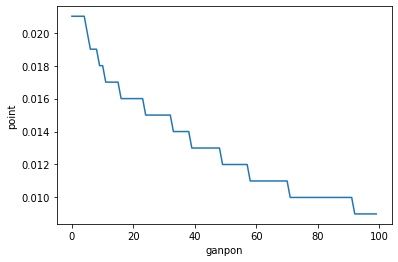

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='ganpon', ylabel='point')

ax.plot(bep['point'])

In [124]:
g = 70000000
print(feecal(g,fee_rate,'const'))

880000.0


In [128]:
gs = pd.DataFrame(np.arange(100)*10000000+10000000, columns=['ganpon'])
gs['fee_const'] = 0
gs['fee_fluct'] = 0
for index, row in gs.iterrows():
    gs.at[index, 'fee_const'] = feecal(gs.at[index, 'ganpon'],fee_rate,'const')
for index, row in gs.iterrows():
    gs.at[index, 'fee_fluct'] = feecal(gs.at[index, 'ganpon'],fee_rate,'fluct')
gs['rate_const'] = gs['fee_const']/gs['ganpon']
gs['rate_fluct'] = gs['fee_fluct']/gs['ganpon']

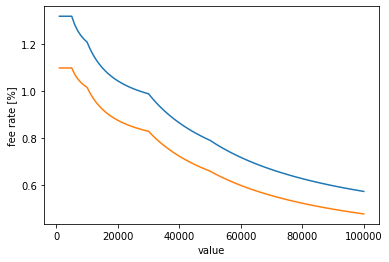

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='value', ylabel='fee rate [%]')

ax.plot(gs['ganpon']/10000,gs['rate_const']*100)
ax.plot(gs['ganpon']/10000,gs['rate_fluct']*100)